## Getting Started with Snorkel

In [ ]:
# For pip users
# !pip install snorkel

# For conda users
# conda install snorkel -c conda-forge

# !pip install python-utils

# !conda install -c conda-forge python-utils

# !pip install django-model-utils

# !pip show requests

# !pip install tensorflow

# import os

# !pip install pandas-profiling

# !pip install progressbar

In [1]:
import progressbar
from time import sleep

In [2]:
import pandas as pd 
import numpy as np
import pandas_profiling

### 1) Writing Labeling Functions

In [151]:
df = pd.read_csv("df_criminal_casetitleXcontent.csv")
df

,case_title,gr_no,content,content_clean,wordcount,tokenized,tokenized_2,lemmatized,lemmatized_clean,case_title_clean,case_title_tokenized,case_title_lemmatized,case_title_lemmatized_clean,case_title_lemmatized_clean_stopwords,test
0,"THE PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPEL...",110817-22,"SECOND DIVISION 110817-22, June 13, 1997 THE ...","This is an appeal from the decision,[1] dated ...",4671,"['This', 'is', 'an', 'appeal', 'from', 'the', ...","['this', 'is', 'an', 'appeal', 'from', 'the', ...",this is an appeal from the decision dated febr...,appeal decision dated february d regional tria...,"THE PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPEL...","['the', 'people', 'of', 'the', 'philippines', ...","['the', 'people', 'of', 'the', 'philippines', ...",the people of the philippines marcelino bugarin,people philippines marcelino bugarin,people philippines marcelino bugarin appeal de...
1,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",110873,"THIRD DIVISION 110873, September 23, 1999 PEO...",Accused-appellant Leonardo Francisco (hereafte...,3712,"['Accused-appellant', 'Leonardo', 'Francisco',...","['leonardo', 'francisco', 'hereafter', 'leonar...",leonardo francisco hereafter leonardo together...,leonardo francisco leonardo estelito francisco...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'leonar...","['people', 'of', 'the', 'philippines', 'leonar...",people of the philippines leonardo francisco a...,people philippines leonardo francisco alias yo...,people philippines leonardo francisco alias yo...
2,"JOAQUIN E. DAVID, PETITIONER, VS. COURT OF APP...",111168-69,"SECOND DIVISION 111168-69, June 17, 1998 JOAQ...",This is a petition for review on certiorari of...,5263,"['This', 'is', 'a', 'petition', 'for', 'review...","['this', 'is', 'a', 'petition', 'for', 'review...",this is a petition for review on certiorari of...,petition review certiorari decision court appe...,"JOAQUIN E. DAVID, PETITIONER, VS. COURT OF APP...","['joaquin', 'david', 'petitioner', 'court', 'o...","['joaquin', 'david', 'petitioner', 'court', 'o...",joaquin david petitioner court of appeals and ...,joaquin david petitioner court appeals people ...,joaquin david petitioner court appeals people ...
3,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",118736-37,"FIRST DIVISION 118736-37, July 23, 1997 PEOPL...",Accused-appellant Tang Wai Lan also known as “...,2497,"['Accused-appellant', 'Tang', 'Wai', 'Lan', 'a...","['tang', 'wai', 'lan', 'also', 'known', 'a', '...",tang wai lan also known a tang wa charged with...,tang wai lan known tang wa charged transportin...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'tang',...","['people', 'of', 'the', 'philippines', 'tang',...",people of the philippines tang wai lan tang,people philippines tang wai lan tang,people philippines tang wai lan tang tang wai ...
4,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",118967,"FIRST DIVISION 118967, July 14, 2000 PEOPLE O...","In every criminal conviction, identification o...",6816,"['In', 'every', 'criminal', 'conviction', ',',...","['in', 'every', 'criminal', 'conviction', 'ide...",in every criminal conviction identification of...,criminal conviction identification accused per...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'ernest...","['people', 'of', 'the', 'philippines', 'ernest...",people of the philippines ernesto dela cruz,people philippines ernesto dela cruz,people philippines ernesto dela cruz criminal ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17753,IN THE MATTER OF THE PETITION FOR HABEAS CORPU...,UDK No. 14817,"THIRD DIVISION UDK No. 14817, January 13, 201...",Petitioner Shirly Vingson (Shirly) alleged tha...,1297,"['Petitioner', 'Shirly', 'Vingson', '(', 'Shir...","['petitioner', 'shirly', 'vingson', 'shirly', ...",petitioner shirly vingson shirly alleged that ...,petitioner shirly vingson shir

In [152]:
df.rename({'content': 'text'}, axis=1, inplace=True)
df 

,case_title,gr_no,text,content_clean,wordcount,tokenized,tokenized_2,lemmatized,lemmatized_clean,case_title_clean,case_title_tokenized,case_title_lemmatized,case_title_lemmatized_clean,case_title_lemmatized_clean_stopwords,test
0,"THE PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPEL...",110817-22,"SECOND DIVISION 110817-22, June 13, 1997 THE ...","This is an appeal from the decision,[1] dated ...",4671,"['This', 'is', 'an', 'appeal', 'from', 'the', ...","['this', 'is', 'an', 'appeal', 'from', 'the', ...",this is an appeal from the decision dated febr...,appeal decision dated february d regional tria...,"THE PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPEL...","['the', 'people', 'of', 'the', 'philippines', ...","['the', 'people', 'of', 'the', 'philippines', ...",the people of the philippines marcelino bugarin,people philippines marcelino bugarin,people philippines marcelino bugarin appeal de...
1,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",110873,"THIRD DIVISION 110873, September 23, 1999 PEO...",Accused-appellant Leonardo Francisco (hereafte...,3712,"['Accused-appellant', 'Leonardo', 'Francisco',...","['leonardo', 'francisco', 'hereafter', 'leonar...",leonardo francisco hereafter leonardo together...,leonardo francisco leonardo estelito francisco...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'leonar...","['people', 'of', 'the', 'philippines', 'leonar...",people of the philippines leonardo francisco a...,people philippines leonardo francisco alias yo...,people philippines leonardo francisco alias yo...
2,"JOAQUIN E. DAVID, PETITIONER, VS. COURT OF APP...",111168-69,"SECOND DIVISION 111168-69, June 17, 1998 JOAQ...",This is a petition for review on certiorari of...,5263,"['This', 'is', 'a', 'petition', 'for', 'review...","['this', 'is', 'a', 'petition', 'for', 'review...",this is a petition for review on certiorari of...,petition review certiorari decision court appe...,"JOAQUIN E. DAVID, PETITIONER, VS. COURT OF APP...","['joaquin', 'david', 'petitioner', 'court', 'o...","['joaquin', 'david', 'petitioner', 'court', 'o...",joaquin david petitioner court of appeals and ...,joaquin david petitioner court appeals people ...,joaquin david petitioner court appeals people ...
3,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",118736-37,"FIRST DIVISION 118736-37, July 23, 1997 PEOPL...",Accused-appellant Tang Wai Lan also known as “...,2497,"['Accused-appellant', 'Tang', 'Wai', 'Lan', 'a...","['tang', 'wai', 'lan', 'also', 'known', 'a', '...",tang wai lan also known a tang wa charged with...,tang wai lan known tang wa charged transportin...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'tang',...","['people', 'of', 'the', 'philippines', 'tang',...",people of the philippines tang wai lan tang,people philippines tang wai lan tang,people philippines tang wai lan tang tang wai ...
4,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",118967,"FIRST DIVISION 118967, July 14, 2000 PEOPLE O...","In every criminal conviction, identification o...",6816,"['In', 'every', 'criminal', 'conviction', ',',...","['in', 'every', 'criminal', 'conviction', 'ide...",in every criminal conviction identification of...,criminal conviction identification accused per...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'ernest...","['people', 'of', 'the', 'philippines', 'ernest...",people of the philippines ernesto dela cruz,people philippines ernesto dela cruz,people philippines ernesto dela cruz criminal ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17753,IN THE MATTER OF THE PETITION FOR HABEAS CORPU...,UDK No. 14817,"THIRD DIVISION UDK No. 14817, January 13, 201...",Petitioner Shirly Vingson (Shirly) alleged tha...,1297,"['Petitioner', 'Shirly', 'Vingson', '(', 'Shir...","['petitioner', 'shirly', 'vingson', 'shirly', ...",petitioner shirly vingson shirly alleged that ...,petitioner shirly vingson shirly 

In [153]:
from sklearn.model_selection import train_test_split
 
df_train, df_test = train_test_split(df, test_size=0.2)

# We pull out the label vectors for ease of use later
# Y_test = df_test.label.values

In [154]:
df_test

,case_title,gr_no,text,content_clean,wordcount,tokenized,tokenized_2,lemmatized,lemmatized_clean,case_title_clean,case_title_tokenized,case_title_lemmatized,case_title_lemmatized_clean,case_title_lemmatized_clean_stopwords,test
10078,PEOPLE VS. VILLAMIL,G.R. No. 34356,"G.R. No. 34356, October 01, 1931 PEOPLE VS. ...",Bigamy; second marriage by married man. Convi...,15,"['Bigamy', ';', 'second', 'marriage', 'by', 'm...","['bigamy', 'second', 'marriage', 'by', 'marrie...",bigamy second marriage by married man convicti...,bigamy second marriage married man conviction ...,PEOPLE VS. VILLAMIL,"['people', 'villamil']","['people', 'villamil']",people villamil,people villamil,people villamil bigamy second marriage married...
17371,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",G.R. Nos. 94992-93,"SECOND DIVISION G.R. Nos. 94992-93, April 07,...","Accused Benjamin Ramirez Sarino, Charlito Rami...",5380,"['Accused', 'Benjamin', 'Ramirez', 'Sarino', '...","['accused', 'benjamin', 'ramirez', 'sarino', '...",accused benjamin ramirez sarino charlito ramir...,accused benjamin ramirez sarino charlito ramir...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'benjam...","['people', 'of', 'the', 'philippines', 'benjam...",people of the philippines benjamin ramirez sar...,people philippines benjamin ramirez sarino cha...,people philippines benjamin ramirez sarino cha...
7016,"JOVENCIO LIM AND TERESITA LIM, PETITIONERS, VS...",G.R. No. 149276,"EN BANC G.R. No. 149276, September 27, 2002 J...","The antecedents of this case, as gathered fro...",1659,"['The', 'antecedent', 'of', 'this', 'case', ',...","['the', 'antecedent', 'of', 'this', 'case', 'a...",the antecedent of this case a gathered from th...,antecedent case gathered party pleading docume...,"JOVENCIO LIM AND TERESITA LIM, PETITIONERS, VS...","['jovencio', 'lim', 'and', 'teresita', 'lim', ...","['jovencio', 'lim', 'and', 'teresita', 'lim', ...",jovencio lim and teresita lim petitioners vs t...,jovencio lim teresita lim petitioners vs peopl...,jovencio lim teresita lim petitioners vs peopl...
6999,"PEOPLE OF THE PHILIPPINES, APPELLEE, VS. SAMRO...",G.R. No. 148822,"FIRST DIVISION G.R. No. 148822, July 12, 2004...",On appeal is the assailed decision of the Regi...,3423,"['On', 'appeal', 'is', 'the', 'assailed', 'dec...","['on', 'appeal', 'is', 'the', 'assailed', 'dec...",on appeal is the assailed decision of the regi...,appeal assailed decision regional trial court ...,"PEOPLE OF THE PHILIPPINES, APPELLEE, VS. SAMRO...","['people', 'of', 'the', 'philippines', 'appell...","['people', 'of', 'the', 'philippines', 'appell...",people of the philippines appellee samrod pend...,people philippines appellee samrod pendatun y ...,people philippines appellee samrod pendatun y ...
10521,"UNITED STATES, PLAINTIFF AND APPELLEE, VS. RIC...",G.R. No. 4164,"G.R. No. 4164, February 26, 1908 UNITED STAT...",HOMICIDE; CONTRADICTORY TESTIMONY.—From the Co...,78,"['HOMICIDE', ';', 'CONTRADICTORY', 'TESTIMONY....","['homicide', 'contradictory', 'the', 'court', ...",homicide contradictory the court of first inst...,homicide contradictory court instance tarlac e...,"UNITED STATES, PLAINTIFF AND APPELLEE, VS. RIC...","['united', 'states', 'plaintiff', 'and', 'appe...","['united', 'states', 'plaintiff', 'and', 'appe...",united states plaintiff and appellee ricardo b...,united states plaintiff appellee ricardo bonif...,united states plaintiff appellee ricardo bonif...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5434,"NARCISO A. TADEO, PETITIONER, VS. PEOPLE OF TH...",G.R. No. 129774,"THIRD DIVISION G.R. No. 129774, December 29, ...",The case before the Court is an appeal via cer...,1468,"['The', 'case', 'before', 'the', 'Court', 'is'...","['the', 'case', 'before', 'the', 'court', 'is'...",the case before the court is an appeal via cer...,case court appeal certiorari taken petitioner ...,"NARCISO A. TADEO, PETITIONER, VS. PEOPLE OF TH...","['narciso', 't

In [155]:
# Define the label mappings for convenience
National_Security = 1
Law_of_the_State = 2
Public_Order= 3
Public_Interest= 4
Prohibited_Drugs= 5
Public_Morals= 6
Public_Officers= 7
Persons= 8
Personal_Liberty= 9
Property= 10
Chastity= 11
Civil_Status= 12
Honor= 13
Quasi_offenses= 14
ABSTAIN = 0


In [156]:
from snorkel.labeling import labeling_function

# National_Security

@labeling_function()
def nat_sec(x):
    return National_Security if "treason" in x.text.lower() \
                            or "sovereignty" in x.text.lower() \
                            or "united states" in x.text.lower() \
                            or "japanese" in x.text.lower() \
                            or "international law" in x.text.lower() \
                            or "war" in x.text.lower() \
                            or "raid" in x.text.lower() \
                            or "guerilla" in x.text.lower() \
                            or "terrorist" in x.text.lower() \
                            or "pirate" in x.text.lower() \
                            or "espionage" in x.text.lower() \
                            or "allegiance" in x.text.lower() else ABSTAIN

# Law_of_the_State

@labeling_function()
def law_state(x):
    return Law_of_the_State if "arbitrary" in x.text.lower() \
                            or "domicile" in x.text.lower() \
                            or "detention" in x.text.lower() \
                            or "detain" in x.text.lower() \
                            or "detainee" in x.text.lower() \
                            or "religious" in x.text.lower() \
                            or "priest" in x.text.lower() \
                            or "god" in x.text.lower() \
                            or "religion" in x.text.lower() \
                            or "scripture" in x.text.lower() \
                            or "warantless" in x.text.lower() \
                            or "dissolution" in x.text.lower() else ABSTAIN

# Public_Order

@labeling_function()
def order(x):
    return Public_Order if "rebellion" in x.text.lower() \
                            or "insurrection" in x.text.lower() \
                            or "coup d etat" in x.text.lower() \
                            or "sedition" in x.text.lower() \
                            or "quasirecidivism" in x.text.lower() \
                            or "separatism" in x.text.lower() \
                            or "harbor" in x.text.lower() \
                            or "cpp" in x.text.lower() \
                            or "npa" in x.text.lower() \
                            or "rebel" in x.text.lower() \
                            or "conspiracy" in x.text.lower() \
                            or "promulgation" in x.text.lower() else ABSTAIN


# Public_Interest

@labeling_function()
def interest(x):
    return Public_Interest if "treasury" in x.text.lower() \
                            or "counterfeiting" in x.text.lower() \
                            or "falsification" in x.text.lower() \
                            or "embezzle" in x.text.lower() \
                            or "auditor" in x.text.lower() \
                            or "importing" in x.text.lower() \
                            or "forgery" in x.text.lower() \
                            or "certificate" in x.text.lower() \
                            or "perjury" in x.text.lower() \
                            or "monopoly" in x.text.lower() \
                            or "seal" in x.text.lower() \
                            or "securities" in x.text.lower() else ABSTAIN

# Prohibited_Drugs

@labeling_function()
def drugs(x):
    return Prohibited_Drugs if "drug" in x.text.lower() \
                            or "shabu" in x.text.lower() \
                            or "opium" in x.text.lower() \
                            or "marijuana" in x.text.lower() \
                            or "possession" in x.text.lower() \
                            or "laboratory" in x.text.lower() \
                            or "meth" in x.text.lower() \
                            or "operation" in x.text.lower() \
                            or "seized" in x.text.lower() \
                            or "bust" in x.text.lower() \
                            or "eucaine" in x.text.lower() \
                            or "narcotic" in x.text.lower() else ABSTAIN

# Public_Morals

@labeling_function()
def morals(x):
    return Public_Morals if "gambling" in x.text.lower() \
                            or "lottery" in x.text.lower() \
                            or "betting" in x.text.lower() \
                            or "cockfighting" in x.text.lower() \
                            or "nudity" in x.text.lower() \
                            or "indecent" in x.text.lower() \
                            or "immoral" in x.text.lower() \
                            or "obscenity" in x.text.lower() \
                            or "obscene" in x.text.lower() \
                            or "importation" in x.text.lower() \
                            or "jueteng" in x.text.lower() \
                            or "wager" in x.text.lower() else ABSTAIN   
 
# Public_Officers

@labeling_function()
def officers(x):
    return Public_Officers if "bribery" in x.text.lower() \
                            or "corrupt" in x.text.lower() \
                            or "graft" in x.text.lower() \
                            or "plunder" in x.text.lower() \
                            or "fraud" in x.text.lower() \
                            or "fund" in x.text.lower() \
                            or "malversation" in x.text.lower() \
                            or "promise" in x.text.lower() \
                            or "gift" in x.text.lower() \
                            or "officer" in x.text.lower() \
                            or "Misfeasance" in x.text.lower() \
                            or "Malfeasance" in x.text.lower() else ABSTAIN   

# Persons

@labeling_function()
def person(x):
    return Persons if "parricide" in x.text.lower() \
                            or "murder" in x.text.lower() \
                            or "homicide" in x.text.lower() \
                            or "suicide" in x.text.lower() \
                            or "mutiliation" in x.text.lower() \
                            or "hazing" in x.text.lower() \
                            or "infanticide" in x.text.lower() \
                            or "abortion" in x.text.lower() \
                            or "kill" in x.text.lower() \
                            or "wound" in x.text.lower() \
                            or "discharge" in x.text.lower() \
                            or "poison" in x.text.lower() else ABSTAIN   

# Personal_Liberty

@labeling_function()
def liberty(x):
    return Personal_Liberty if "kidnapping" in x.text.lower() \
                            or "kidnap" in x.text.lower() \
                            or "slavery" in x.text.lower() \
                            or "child labor" in x.text.lower() \
                            or "coercion" in x.text.lower() \
                            or "vexation" in x.text.lower() \
                            or "ransom" in x.text.lower() \
                            or "money" in x.text.lower() \
                            or "guardian" in x.text.lower() \
                            or "child" in x.text.lower() \
                            or "detention" in x.text.lower() \
                            or "servitude" in x.text.lower() else ABSTAIN  

# Property

@labeling_function()
def prop(x):
    return Property if "robbery" in x.text.lower() \
                            or "theft" in x.text.lower() \
                            or "checks" in x.text.lower() \
                            or "estafa" in x.text.lower() \
                            or "property" in x.text.lower() \
                            or "mortgage" in x.text.lower() \
                            or "arson" in x.text.lower() \
                            or "carnapping" in x.text.lower() \
                            or "land" in x.text.lower() \
                            or "swindling" in x.text.lower() \
                            or "brigand" in x.text.lower() \
                            or "brigandage" in x.text.lower() else ABSTAIN  

# Chastity

@labeling_function()
def chast(x):
    return Chastity if "adultery" in x.text.lower() \
                            or "concubine" in x.text.lower() \
                            or "lascivious" in x.text.lower() \
                            or "seduce" in x.text.lower() \
                            or "chastity" in x.text.lower() \
                            or "sexual" in x.text.lower() \
                            or "rape" in x.text.lower() \
                            or "intercourse" in x.text.lower() \
                            or "seduction" in x.text.lower() \
                            or "abduction" in x.text.lower() \
                            or "vagina" in x.text.lower() \
                            or "panty" in x.text.lower() else ABSTAIN  

# Civil_Status

@labeling_function()
def civil(x):
    return Civil_Status if "marriage" in x.text.lower() \
                            or "ceremony" in x.text.lower() \
                            or "bigamy" in x.text.lower() \
                            or "married" in x.text.lower() \
                            or "null" in x.text.lower() \
                            or "spouse" in x.text.lower() \
                            or "wife" in x.text.lower() \
                            or "husband" in x.text.lower() \
                            or "wedding" in x.text.lower() \
                            or "void" in x.text.lower() \
                            or "abandonment" in x.text.lower() \
                            or "premature" in x.text.lower() else ABSTAIN 


# Honor

@labeling_function()
def honors(x):
    return Honor if "libel" in x.text.lower() \
                            or "publish" in x.text.lower() \
                            or "slander" in x.text.lower() \
                            or "truth" in x.text.lower() \
                            or "publicity" in x.text.lower() \
                            or "incrimination" in x.text.lower() \
                            or "incriminate" in x.text.lower() \
                            or "defamation" in x.text.lower() \
                            or "wire tapping" in x.text.lower() \
                            or "communication" in x.text.lower() \
                            or "publication" in x.text.lower() \
                            or "writings" in x.text.lower() else ABSTAIN 


# Quasi_offenses= 14

@labeling_function()
def quasi(x):
    return Quasi_offenses if "negligence" in x.text.lower() \
                            or "material" in x.text.lower() \
                            or "reckless" in x.text.lower() \
                            or "imprudence" in x.text.lower() \
                            or "accident" in x.text.lower() \
                            or "injury" in x.text.lower() \
                            or "damage" in x.text.lower() \
                            or "hospital" in x.text.lower() \
                            or "carelessness" in x.text.lower() \
                            or "destroy" in x.text.lower() \
                            or "vehicle" in x.text.lower() \
                            or "car" in x.text.lower() else ABSTAIN 


### 2) Combining & Cleaning the Labels

In [157]:
from snorkel.labeling.model import LabelModel
from snorkel.labeling import PandasLFApplier

# Define the set of labeling functions (LFs)
lfs = [nat_sec, law_state, order, interest, drugs, morals, officers, person, liberty, prop, chast, civil, honors, quasi]

# Apply the LFs to the unlabeled training data
applier = PandasLFApplier(lfs) 
L_train = applier.apply(df_train)

# # Train the label model and compute the training labels
# label_model = LabelModel(cardinality=2, verbose=True)
# label_model.fit(L_train, n_epochs=500, log_freq=50, seed=123)
# df_train["label"] = label_model.predict(L=L_train, tie_break_policy="abstain")

100%|██████████| 14206/14206 [07:06<00:00, 33.33it/s] 


In [158]:
L_train

array([[ 1,  0,  0, ...,  0, 13, 14],
       [ 1,  0,  3, ...,  0,  0, 14],
       [ 1,  2,  0, ..., 12, 13, 14],
       ...,
       [ 1,  2,  0, ..., 12,  0, 14],
       [ 1,  2,  0, ..., 12, 13, 14],
       [ 0,  0,  0, ...,  0,  0, 14]])

In [130]:
# Use this when encountering is_builtin_func error
# pip install pandas==1.2.5
# pip install networkx==2.3
# print(pd.__version__)

In [131]:
# df_train = df_train[df_train.label == ABSTAIN]

In [159]:
coverage_nat_sec, coverage_law_state, coverage_order, coverage_interest, coverage_drugs, coverage_morals, coverage_officers, coverage_person, coverage_liberty, coverage_prop, coverage_chast, coverage_civil, coverage_honors, coverage_quasi = (L_train != ABSTAIN).mean(axis=0)
print(f"coverage_nat_sec: {coverage_nat_sec * 100:.1f}%")
print(f"coverage_law_state: {coverage_law_state * 100:.1f}%")
print(f"coverage_order: {coverage_order * 100:.1f}%")
print(f"coverage_interest: {coverage_interest * 100:.1f}%")
print(f"coverage_drugs: {coverage_drugs * 100:.1f}%")
print(f"coverage_morals: {coverage_morals * 100:.1f}%")
print(f"coverage_officers: {coverage_officers * 100:.1f}%")
print(f"coverage_person: {coverage_person * 100:.1f}%")
print(f"coverage_liberty: {coverage_liberty * 100:.1f}%")
print(f"coverage_prop: {coverage_prop * 100:.1f}%")
print(f"coverage_chast: {coverage_chast * 100:.1f}%")
print(f"coverage_civil: {coverage_civil * 100:.1f}%")
print(f"coverage_honors: {coverage_honors * 100:.1f}%")
print(f"coverage_quasi: {coverage_quasi * 100:.1f}%")




coverage_nat_sec: 82.2%
coverage_law_state: 31.2%
coverage_order: 25.7%
coverage_interest: 31.2%
coverage_drugs: 51.9%
coverage_morals: 5.2%
coverage_officers: 59.9%
coverage_person: 60.5%
coverage_liberty: 55.8%
coverage_prop: 56.1%
coverage_chast: 24.9%
coverage_civil: 59.9%
coverage_honors: 38.3%
coverage_quasi: 88.3%


In [172]:
# from snorkel.labeling import LFAnalysis

# LFAnalysis(L=L_train, lfs=lfs).lf_summary()

In [161]:
df_train

,case_title,gr_no,text,content_clean,wordcount,tokenized,tokenized_2,lemmatized,lemmatized_clean,case_title_clean,case_title_tokenized,case_title_lemmatized,case_title_lemmatized_clean,case_title_lemmatized_clean_stopwords,test
3649,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",G.R. No. 108505,"THIRD DIVISION G.R. No. 108505, December 05, ...","In statutory rape, only two elements need to b...",3775,"['In', 'statutory', 'rape', ',', 'only', 'two'...","['in', 'statutory', 'rape', 'only', 'two', 'el...",in statutory rape only two element need to be ...,statutory rape element need established accuse...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'ariel'...","['people', 'of', 'the', 'philippines', 'ariel'...",people of the philippines ariel oliva y cortero,people philippines ariel oliva y cortero,people philippines ariel oliva y cortero statu...
2605,"PEOPLE OF THE PHILIPPINES, PETITIONER, VS. SAN...",G.R. NO. 158754,"EN BANC G.R. NO. 158754, August 10, 2007 PEOP...",The instant petition for certiorari under Rule...,5005,"['The', 'instant', 'petition', 'for', 'certior...","['the', 'instant', 'petition', 'for', 'certior...",the instant petition for certiorari under rule...,instant petition certiorari rule rules court s...,"PEOPLE OF THE PHILIPPINES, PETITIONER, VS. SAN...","['people', 'of', 'the', 'philippines', 'petiti...","['people', 'of', 'the', 'philippines', 'petiti...",people of the philippines petitioner sandiganb...,people philippines petitioner sandiganbayan sp...,people philippines petitioner sandiganbayan sp...
16714,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",G.R. Nos. 130665,"EN BANC G.R. Nos. 130665, April 21, 1999 PEOP...",This is an appeal from the decision of the Reg...,5334,"['This', 'is', 'an', 'appeal', 'from', 'the', ...","['this', 'is', 'an', 'appeal', 'from', 'the', ...",this is an appeal from the decision of the reg...,appeal decision regional trial court oroquieta...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'pedro'...","['people', 'of', 'the', 'philippines', 'pedro'...",people of the philippines pedro baliao empante...,people philippines pedro baliao empante peter,people philippines pedro baliao empante peter ...
16992,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",G.R. Nos. 145172-74,"EN BANC G.R. Nos. 145172-74, February 28, 200...","Appellant herein, Ireneo Corral y Paladino, wa...",3820,"['Appellant', 'herein', ',', 'Ireneo', 'Corral...","['appellant', 'herein', 'ireneo', 'corral', 'y...",appellant herein ireneo corral y paladino wa c...,appellant ireneo corral y paladino wa charged ...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'ireneo...","['people', 'of', 'the', 'philippines', 'ireneo...",people of the philippines ireneo corral,people philippines ireneo corral,people philippines ireneo corral appellant ire...
9448,"ADINA B. MANANSALA, PETITIONER, VS. PEOPLE OF ...",G.R. No. 215424,"FIRST DIVISION G.R. No. 215424, December 09, ...",Assailed in this petition for review on certio...,2340,"['Assailed', 'in', 'this', 'petition', 'for', ...","['assailed', 'in', 'this', 'petition', 'for', ...",assailed in this petition for review on certio...,assailed petition review certiorari decision d...,"ADINA B. MANANSALA, PETITIONER, VS. PEOPLE OF ...","['adina', 'manansala', 'petitioner', 'people',...","['adina', 'manansala', 'petitioner', 'people',...",adina manansala petitioner people of the phili...,adina manansala petitioner people philippines ...,adina manansala petitioner people philippines ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,RE: REPORT ON THE JUDICIAL AUDIT CONDUCTED AT ...,A.M. NO. 08-3-73-METC,"SECOND DIVISION A.M. NO. 08-3-73-METC, July 3...","From July 12 to 19, 2007, the audit team of th...",6505,"['From', 'July', '12', 'to', '19', ',', '2007'...","['from', 'july', 'to', 'the', 'audit', 'team',...",from ju

In [162]:
df_train.iloc[L_train[:, 1] == ABSTAIN].sample(2, random_state=1) 

,case_title,gr_no,text,content_clean,wordcount,tokenized,tokenized_2,lemmatized,lemmatized_clean,case_title_clean,case_title_tokenized,case_title_lemmatized,case_title_lemmatized_clean,case_title_lemmatized_clean_stopwords,test
3914,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...",G.R. No. 112448,"SECOND DIVISION G.R. No. 112448, October 30, ...","Agapito Lopez, Alfredo Datu, Jaziel Datu, Noel...",4793,"['Agapito', 'Lopez', ',', 'Alfredo', 'Datu', '...","['agapito', 'lopez', 'alfredo', 'datu', 'jazie...",agapito lopez alfredo datu jaziel datu noel de...,agapito lopez alfredo datu jaziel datu noel de...,"PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...","['people', 'of', 'the', 'philippines', 'agapit...","['people', 'of', 'the', 'philippines', 'agapit...",people of the philippines agapito lopez alfred...,people philippines agapito lopez alfredo datu ...,people philippines agapito lopez alfredo datu ...
1714,"THE UNITED STATES, PLAINTIFF AND APPELLEE, VS...",G. R. No. 6204,"G. R. No. 6204, December 09, 1910 THE UNITED...",Appellant in this case was convicted of the cr...,1210,"['Appellant', 'in', 'this', 'case', 'wa', 'con...","['appellant', 'in', 'this', 'case', 'wa', 'con...",appellant in this case wa convicted of the cri...,appellant case wa convicted crime faithlessnes...,"THE UNITED STATES, PLAINTIFF AND APPELLEE, VS...","['the', 'united', 'states', 'plaintiff', 'and'...","['the', 'united', 'states', 'plaintiff', 'and'...",the united states plaintiff and appellee modes...,united states plaintiff appellee modesto balil...,united states plaintiff appellee modesto balil...


In [163]:
# from snorkel.analysis import get_label_buckets

# buckets = get_label_buckets(L_train[:, 1], L_train[:, 2])
# df_train.iloc[buckets[(nat_sec, ABSTAIN)]].sample(2, random_state=1)  

In [164]:
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df_train)
L_test = applier.apply(df=df_test)

100%|██████████| 3552/3552 [01:27<00:00, 40.82it/s]


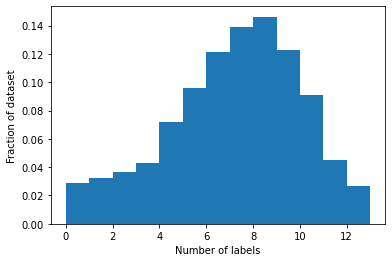

In [165]:
import matplotlib.pyplot as plt

%matplotlib inline


def plot_label_frequency(L):
    plt.hist((L != ABSTAIN).sum(axis=1), density=True, bins=range(L.shape[1]))
    plt.xlabel("Number of labels")
    plt.ylabel("Fraction of dataset")
    plt.show()


plot_label_frequency(L_train)

In [166]:
# from snorkel.labeling import model
# from snorkel.labeling.apply import pandas as apply

# majority_model = model.MajorityLabelVoter()
# preds_train_majority = majority_model.predict(L=L_train)

In [167]:
# preds_train_majority

In [168]:
label_model = model.LabelModel(cardinality=15, verbose=True)
label_model.fit(L_train=L_train, n_epochs=500, lr=0.001, log_freq=100, seed=123)
preds_train_label = label_model.predict(L=L_train)
df_train["label"] = label_model.predict(L=L_train, tie_break_policy="abstain")

<ipython-input-168-d2207d81fb2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["label"] = label_model.predict(L=L_train, tie_break_policy="abstain")


In [169]:
preds_train_label

array([0, 0, 0, ..., 0, 0, 0])

# DISREGARD FOR NOW

In [ ]:
majority_acc = majority_model.score(L=L_test, Y=Y_test, tie_break_policy="random")[
    "accuracy"
]
print(f"{'Majority Vote Accuracy:':<25} {majority_acc * 100:.1f}%")

label_model_acc = label_model.score(L=L_test, Y=Y_test, tie_break_policy="random")[
    "accuracy"
]
print(f"{'Label Model Accuracy:':<25} {label_model_acc * 100:.1f}%")

In [ ]:
import matplotlib.pyplot as plt

def plot_probabilities_histogram(Y):
    plt.hist(Y, bins=10)
    plt.xlabel("Probability of SPAM")
    plt.ylabel("Number of data points")
    plt.show()


probs_train = label_model.predict_proba(L=L_train)
plot_probabilities_histogram(probs_train[:, nat_sec])

In [ ]:
from snorkel.labeling import filter_unlabeled_dataframe

df_train_filtered, probs_train_filtered = filter_unlabeled_dataframe(
    X=df_train, y=probs_train, L=L_train
)

### 3) Writing Transformation Functions for Data Augmentation

In [ ]:
import random

import nltk
from nltk.corpus import wordnet as wn

from snorkel.augmentation import transformation_function

nltk.download("wordnet", quiet=True)


def get_synonyms(word):
    """Get the synonyms of word from Wordnet."""
    lemmas = set().union(*[s.lemmas() for s in wn.synsets(word)])
    return list(set(l.name().lower().replace("_", " ") for l in lemmas) - {word})


@transformation_function()
def tf_replace_word_with_synonym(x):
    """Try to replace a random word with a synonym."""
    words = x.text.lower().split()
    idx = random.choice(range(len(words)))
    synonyms = get_synonyms(words[idx])
    if len(synonyms) > 0:
        x.text = " ".join(words[:idx] + [synonyms[0]] + words[idx + 1 :])
        return x 

In [ ]:
from snorkel.augmentation import ApplyOnePolicy, PandasTFApplier

tf_policy = ApplyOnePolicy(n_per_original=2, keep_original=True)
tf_applier = PandasTFApplier([tf_replace_word_with_synonym], tf_policy)
df_train_augmented = tf_applier.apply(df_train)

### 4) Writing a Slicing Function

In [ ]:
from snorkel.slicing import slicing_function


@slicing_function()
def short_link(x):
    """Return whether text matches common pattern for shortened ".ly" links."""
    return int(bool(re.search(r"\w+\.ly", x.text)))

### 5) Training a Classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


vectorizer = CountVectorizer(ngram_range=(1, 5))
X_train = vectorizer.fit_transform(df_train_filtered.text.tolist())
X_test = vectorizer.transform(df_test.text.tolist())


In [ ]:
from snorkel.utils import probs_to_preds

preds_train_filtered = probs_to_preds(probs=probs_train_filtered)

In [ ]:
from sklearn.linear_model import LogisticRegression

sklearn_model = LogisticRegression(C=1e3, solver="liblinear")
sklearn_model.fit(X=X_train, y=preds_train_filtered)

In [ ]:
print(f"Test Accuracy: {sklearn_model.score(X=X_test, y=Y_test) * 100:.1f}%")

In [ ]:
from sklearn.model_selection import train_test_split
 
df_train, df_test = train_test_split(df, test_size=0.2)

# We pull out the label vectors for ease of use later
Y_test = df_test.label.values

In [ ]:
from snorkel.labeling import labeling_function


@labeling_function()
def check(x):
    return SPAM if "check" in x.text.lower() else ABSTAIN


@labeling_function()
def check_out(x):
    return SPAM if "check out" in x.text.lower() else ABSTAIN

In [ ]:
def _is_builtin_func(self, arg):
    """
    if we define an builtin function for this argument, return it,
    otherwise return the arg
    """
    return SelectionMixin._builtin_table.get(arg, arg)

In [ ]:
# from snorkel.labeling import PandasLFApplier

# lfs = [check_out, check]

# applier = PandasLFApplier(lfs=lfs)
# L_train = applier.apply(df=df_train)
# L_train

In [ ]:
from snorkel.preprocess import preprocessor
from textblob import TextBlob


@preprocessor(memoize=True)
def textblob_sentiment(x):
    scores = TextBlob(x.text)
    x.polarity = scores.sentiment.polarity
    x.subjectivity = scores.sentiment.subjectivity
    return x

In [ ]:
@labeling_function(pre=[textblob_sentiment])
def textblob_polarity(x):
    return HAM if x.polarity > 0.9 else ABSTAIN

In [ ]:
@labeling_function(pre=[textblob_sentiment])
def textblob_subjectivity(x):
    return HAM if x.subjectivity >= 0.5 else ABSTAIN

In [ ]:
lfs = [textblob_polarity, textblob_subjectivity]

applier = PandasLFApplier(lfs)
L_train = applier.apply(df_train)

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
# tqdm_notebook().pandas(*args, **kwargs)

### Keywords Search

In [ ]:
# For clarity, we define constants to represent the class labels for spam, ham, and abstaining.
nation_sec = 0
law_state = 1
public_order = 2 
public_interest = 3 
prohibited_drugs = 4 
public_morals = 5 
public_officers = 6 
persons = 7 
personal_liberty = 8
property_crime = 9 
chastity = 10
status = 11
honor = 12
quasi = 13

In [ ]:
from snorkel.labeling import LabelingFunction


def keyword_lookup(x, keywords, label):
    if any(word in x.text.lower() for word in keywords):
        return label
    return ABSTAIN


def make_keyword_lf(keywords, #label=SPAM):
    return LabelingFunction(
        name=f"keyword_{keywords[0]}",
        f=keyword_lookup,
        resources=dict(keywords=keywords, label=label),
    )


"""Crimes against National Security and Laws of Nations"""
nation_sec = make_keyword_lf(keywords.str.contains(("treason|sovereignty|united states|japanese|international law|war|raid|guerilla|terrorist|pirate|espionage|allegiance")),
                             label=nation_sec)

"""Spam comments ask users to subscribe to their channels."""
nation_sec = make_keyword_lf(keywords.str.contains(("treason|sovereignty|united states|japanese|international law|war|raid|guerilla|terrorist|pirate|espionage|allegiance")),
                             label=nation_sec)

"""Spam comments post links to other channels."""
nation_sec = make_keyword_lf(keywords.str.contains(("treason|sovereignty|united states|japanese|international law|war|raid|guerilla|terrorist|pirate|espionage|allegiance")),
                             label=nation_sec)

"""Spam comments make requests rather than commenting."""
nation_sec = make_keyword_lf(keywords.str.contains(("treason|sovereignty|united states|japanese|international law|war|raid|guerilla|terrorist|pirate|espionage|allegiance")),
                             label=nation_sec)

"""Ham comments actually talk about the video's content."""
nation_sec = make_keyword_lf(keywords.str.contains(("treason|sovereignty|united states|japanese|international law|war|raid|guerilla|terrorist|pirate|espionage|allegiance")),
                             label=nation_sec)
                    
"""Ham comments actually talk about the video's content."""
nation_sec = make_keyword_lf(keywords.str.contains(("treason|sovereignty|united states|japanese|international law|war|raid|guerilla|terrorist|pirate|espionage|allegiance")),
                             label=nation_sec)
                    
"""Ham comments actually talk about the video's content."""
nation_sec = make_keyword_lf(keywords.str.contains(("treason|sovereignty|united states|japanese|international law|war|raid|guerilla|terrorist|pirate|espionage|allegiance")),
                             label=nation_sec)
                    
"""Ham comments actually talk about the video's content."""
nation_sec = make_keyword_lf(keywords.str.contains(("treason|sovereignty|united states|japanese|international law|war|raid|guerilla|terrorist|pirate|espionage|allegiance")),
                             label=nation_sec)

In [ ]:
lfs = [
    nation_sec,
#     keyword_subscribe,
#     keyword_link,
#     keyword_please,
#     keyword_song,
]

In [ ]:
merged = df 
merged

In [ ]:
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df_train)

In [ ]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline


def plot_label_frequency(L):
    plt.hist((L != ABSTAIN).sum(axis=1), density=True, bins=range(L.shape[1]))
    plt.xlabel("Number of labels")
    plt.ylabel("Fraction of dataset")
    plt.show()


plot_label_frequency(L_train)

In [ ]:
from snorkel.labeling.model import MajorityLabelVoter

majority_model = MajorityLabelVoter()

In [ ]:
preds_train

In [ ]:
from snorkel.labeling.model import LabelModel

label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train=L_train, n_epochs=500, log_freq=100, seed=123)

In [ ]:
majority_acc = majority_model.score(L=L_test, Y=Y_test, tie_break_policy="random")[
    "accuracy"
]
print(f"{'Majority Vote Accuracy:':<25} {majority_acc * 100:.1f}%")

label_model_acc = label_model.score(L=L_test, Y=Y_test, tie_break_policy="random")[
    "accuracy"
]
print(f"{'Label Model Accuracy:':<25} {label_model_acc * 100:.1f}%")

In [ ]:
def plot_probabilities_histogram(Y):
    plt.hist(Y, bins=10)
    plt.xlabel("Probability of #SPAM")
    plt.ylabel("Number of data points")
    plt.show()


probs_train = label_model.predict_proba(L=L_train)
plot_probabilities_histogram(probs_train[:, #SPAM])

In [ ]:
from snorkel.labeling import filter_unlabeled_dataframe

df_train_filtered, probs_train_filtered = filter_unlabeled_dataframe(
    X=df_train, y=probs_train, L=L_train
)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 5))
X_train = vectorizer.fit_transform(df_train_filtered.text.tolist())
X_test = vectorizer.transform(df_test.text.tolist())

In [ ]:
from snorkel.utils import probs_to_preds

preds_train_filtered = probs_to_preds(probs=probs_train_filtered)

In [ ]:
from sklearn.linear_model import LogisticRegression

sklearn_model = LogisticRegression(C=1e3, solver="liblinear")
sklearn_model.fit(X=X_train, y=preds_train_filtered)

In [ ]:
print(f"Test Accuracy: {sklearn_model.score(X=X_test, y=Y_test) * 100:.1f}%")